In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


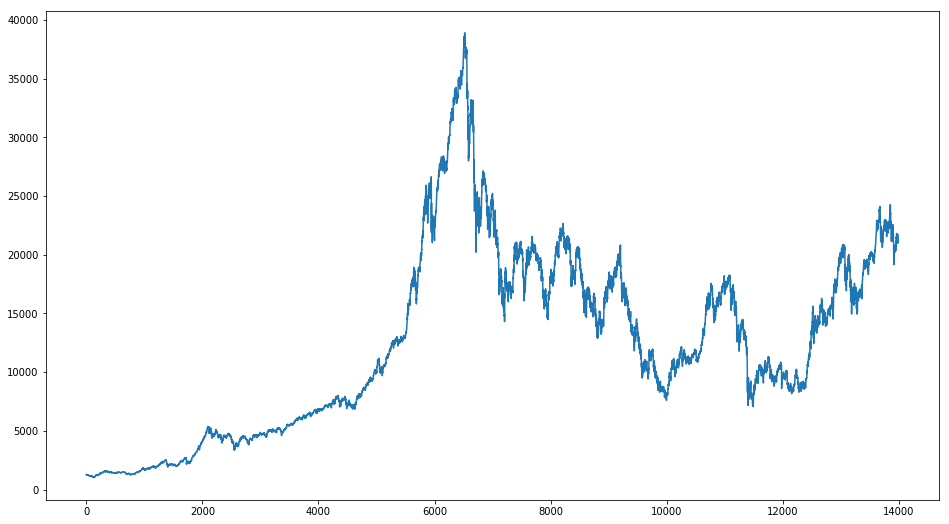

In [2]:
# data = pd.read_csv("MarketData/TWII_Daily.csv") 
data = pd.read_csv("MarketData/N225_Nikkei_Daily.csv") 
data = data.dropna()
plt.figure(figsize=(16,9))
plt.plot(data.Close)

In [3]:
max_slope = 1 + 60
max_vol = 1 + 60
for i in range(1, max_slope):
    data['r'+str(i)] = data.Close.pct_change(i)
for i in range(5, max_vol):
    data['vol'+str(i)] = data.Close.rolling(i).std()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,r1,r2,r3,...,vol51,vol52,vol53,vol54,vol55,vol56,vol57,vol58,vol59,vol60
0,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0,0.004985,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0,0.008133,0.013159,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0,0.009543,0.017753,0.022827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0.0,0.001640,0.011199,0.019423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['Return'] = data.Close.pct_change()
data = data.dropna().iloc[100:,:].reset_index().iloc[:,1:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,r1,r2,r3,...,vol52,vol53,vol54,vol55,vol56,vol57,vol58,vol59,vol60,Return
0,1965-08-30,1245.489990,1245.489990,1245.489990,1245.489990,1245.489990,0.0,0.025137,0.039311,0.038852,...,58.484780,58.127476,57.708656,57.217393,56.697093,56.195118,55.703295,55.245390,54.821741,0.025137
1,1965-08-31,1255.579956,1255.579956,1255.579956,1255.579956,1255.579956,0.0,0.008101,0.033442,0.047731,...,62.077937,61.811526,61.451860,61.029193,60.529763,59.993270,59.477094,58.962637,58.474831,0.008101
2,1965-09-01,1249.719971,1249.719971,1249.719971,1249.719971,1249.719971,0.0,-0.004667,0.003396,0.028618,...,65.265376,64.728314,64.467026,64.111530,63.691325,63.190304,62.645299,62.122032,61.593385,-0.004667
3,1965-09-02,1240.069946,1240.069946,1240.069946,1240.069946,1240.069946,0.0,-0.007722,-0.012353,-0.004352,...,67.725179,67.224714,66.695362,66.445295,66.099692,65.687533,65.190767,64.644017,64.119970,-0.007722
4,1965-09-03,1256.219971,1256.219971,1256.219971,1256.219971,1256.219971,0.0,0.013023,0.005201,0.000510,...,70.740835,70.065097,69.572507,69.048745,68.806935,68.468639,68.062243,67.567842,67.017795,0.013023


In [5]:
from scipy.signal import argrelextrema

n= 20 # number of points to be checked before and after 
# Find local peaks
reg_target = pd.DataFrame()
reg_target['Date'] = data.Date
reg_target['Close'] = data.Close
reg_target['min'] = data.iloc[argrelextrema(data.Close.values, np.less_equal, order=n)[0]]['Close']
reg_target['max'] = data.iloc[argrelextrema(data.Close.values, np.greater_equal, order=n)[0]]['Close']

reg_target['is_min'] = (reg_target['min'] > 0).astype(int) * -1 
reg_target['is_max'] = (reg_target['max'] > 0).astype(int) * 1 
reg_target['target'] = reg_target.is_min + reg_target.is_max

reg_target = reg_target.dropna(axis=1)
reg_target.head(20)

,Date,Close,is_min,is_max,target
0,1965-08-30,1245.489990,0,0,0
1,1965-08-31,1255.579956,0,0,0
2,1965-09-01,1249.719971,0,0,0
3,1965-09-02,1240.069946,0,0,0
4,1965-09-03,1256.219971,0,0,0
5,1965-09-06,1235.780029,0,0,0
6,1965-09-07,1239.979980,0,0,0
7,1965-09-08,1260.020020,0,0,0
8,1965-09-09,1277.150024,0,1,1
9,1965-09-10,1273.229980,0,0,0


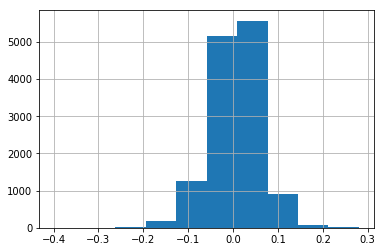

In [6]:
data.r20.hist()

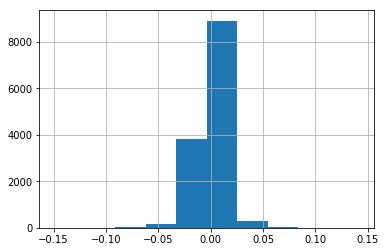

In [7]:
data.r1.hist()

In [8]:
train_start = 6000
train_end = train_start+6000
test_point = 800
X_train = data.iloc[train_start:train_end, 7:-1]
# X_train = data.iloc[train_start:train_end, 8:]

y_train = reg_target['target'].iloc[train_start:train_end].values
X_test = data.iloc[train_end:train_end+test_point, 7:-1]

# X_test = data.iloc[train_end:train_end+test_point, 8:]
y_test = reg_target['target'].iloc[train_end:train_end+test_point].values

price_train = data.Close.iloc[train_start:train_end].values
price_test = data.Close.iloc[train_end:train_end+test_point].values

In [9]:
X_train.shape, y_train.shape

((6000, 116), (6000,))

In [10]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

regr2 = RandomForestRegressor(n_estimators=100, max_depth=46)
regr2.fit(X_train, y_train)
print('train score : ', regr2.score(X_train, y_train))
print('test score : ', regr2.score(X_test, y_test))

train score :  0.8664932444755491
test score :  0.09495950866894977


In [11]:
pred_train = regr2.predict(X_train)
pred_test = regr2.predict(X_test)*n

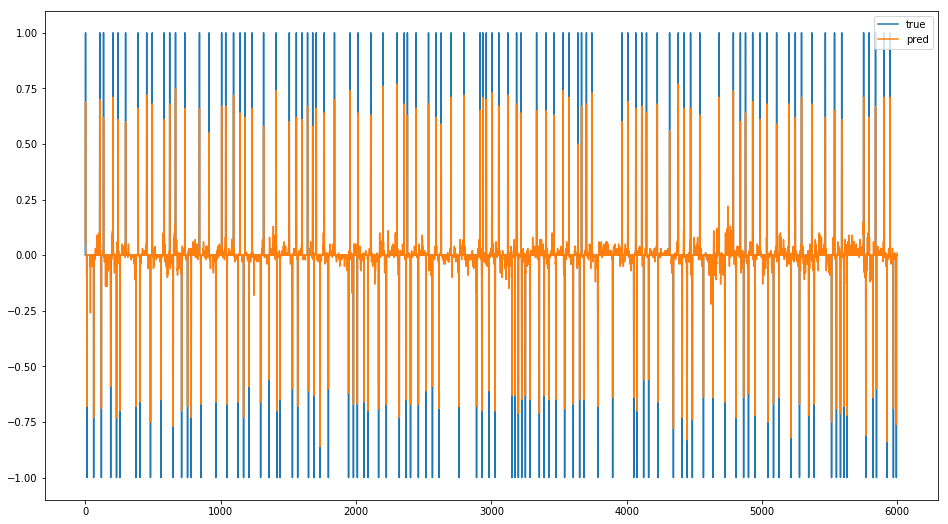

In [12]:
plt.figure(figsize=(16,9))
plt.plot(y_train, label='true')
plt.plot(pred_train, label='pred')
plt.legend()
plt.show()

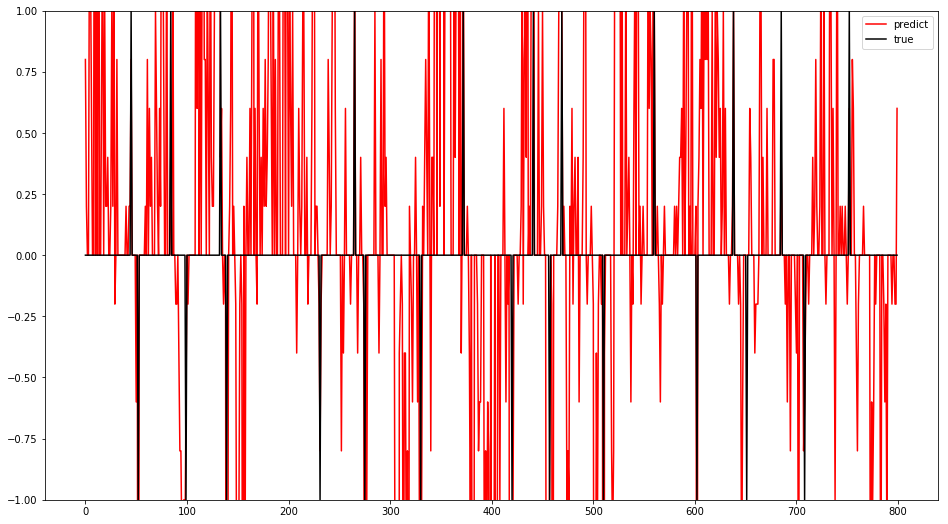

In [13]:
plt.figure(figsize=(16,9))
# plt.plot(y_test.values, label='true')
plt.plot(pred_test, label='predict', color='red')
plt.plot(y_test, label='true', color='black')
plt.ylim(-1, 1)
plt.legend()
plt.show()

In [14]:
# next job finding predict next return in n days is > or < +-5% 
# find prediction error 

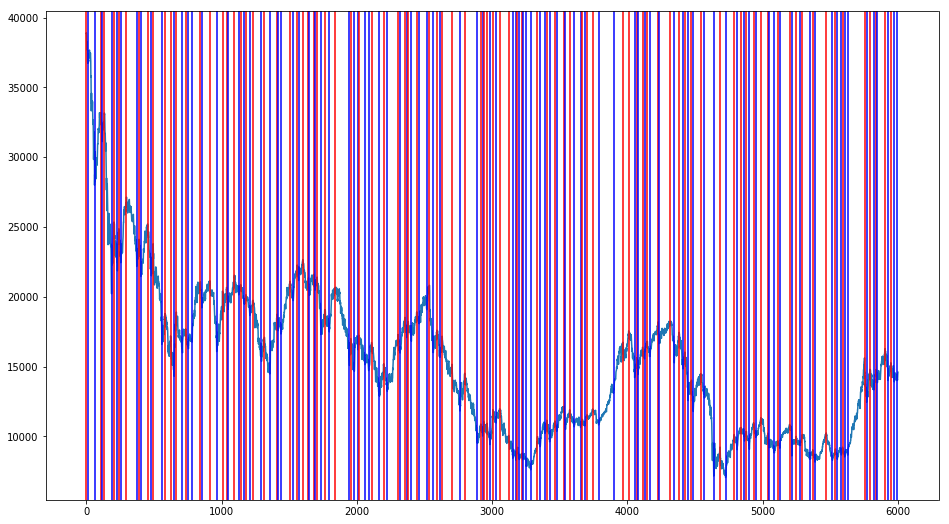

In [15]:
plt.figure(figsize=(16,9))
plt.plot(price_train)
for i in range(len(price_train)):
    if pred_train[i] > 0.5:
        plt.axvline(i, color='red')
    elif pred_train[i] < -0.5:
        plt.axvline(i, color='blue')

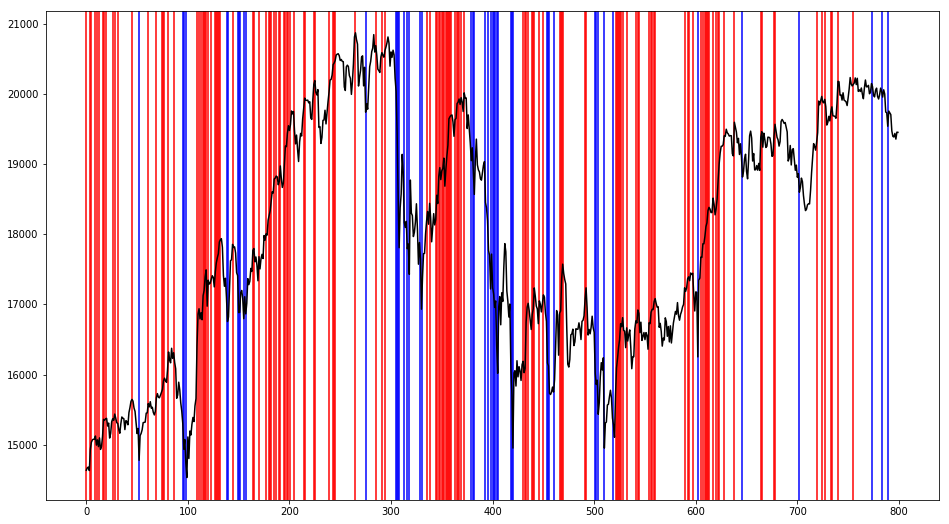

In [16]:
plt.figure(figsize=(16,9))
for i in range(len(price_test)):
    if pred_test[i] > 0.75 : 
        plt.axvline(i, color='red')
    elif pred_test[i] < -1 :
        plt.axvline(i, color='blue')
#     if y_test[i] > 0.5 : 
#         plt.axvline(i, color='black')
#     elif y_test[i] < -0.5 :
#         plt.axvline(i, color='black')    
plt.plot(price_test, color='black')
plt.show()

In [17]:
n= 5 # number of points to be checked before and after 
# Find local peaks
reg_target = pd.DataFrame()
reg_target['Date'] = data.Date
reg_target['Close'] = data.Close
reg_target['pct_top'] = data.Close.pct_change(n).rolling(n).max().shift(-n)
reg_target['pct_bot'] = data.Close.pct_change(n).rolling(n).min().shift(-n)
reg_target['pct_change'] = data.Close.pct_change(n).shift(-n) # next n day return 
reg_target['target'] = (reg_target['pct_bot'] <= -0.02).astype(int) | (reg_target['pct_top'] >= 0.02).astype(int) * -1 
# reg_target['target'] = (reg_target['pct_change'] <= -0.03).astype(int) | (reg_target['pct_change'] >= 0.03).astype(int) * -1 
reg_target = reg_target.dropna()
reg_target

,Date,Close,pct_top,pct_bot,pct_change,target
4,1965-09-03,1256.219971,0.029902,-0.012425,0.013541,-1
5,1965-09-06,1235.780029,0.029902,-0.012425,0.011742,-1
6,1965-09-07,1239.979980,0.029902,0.008161,0.008161,-1
7,1965-09-08,1260.020020,0.029902,-0.013547,-0.013547,-1
8,1965-09-09,1277.150024,0.013541,-0.013547,-0.008417,0
9,1965-09-10,1273.229980,0.011742,-0.013547,-0.001155,0
10,1965-09-13,1250.290039,0.008161,-0.013547,0.002367,0
11,1965-09-14,1250.099976,0.002367,-0.013547,0.001648,0
12,1965-09-16,1242.949951,0.002367,-0.008417,0.000362,0
13,1965-09-17,1266.400024,0.002367,-0.026050,-0.026050,1


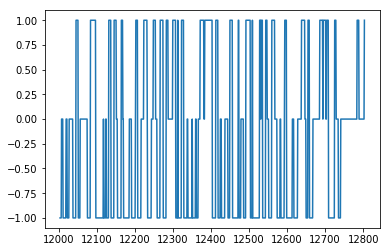

In [18]:
test_target = reg_target.iloc[train_end:train_end+test_point].target
plt.plot(test_target)

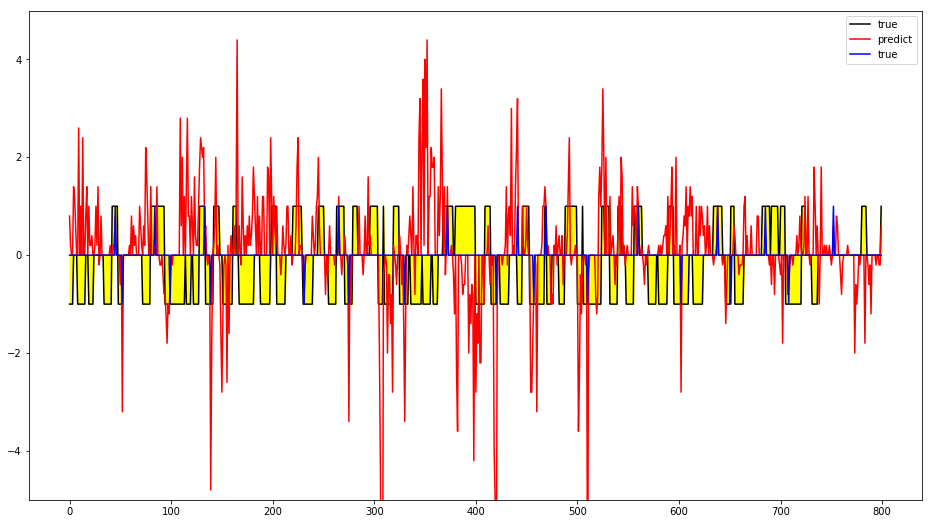

In [19]:
# plt.plot(reg_target.target)
plt.figure(figsize=(16,9))
# plt.plot(y_test.values, label='true')
x = np.arange(len(pred_test))
plt.plot(test_target.values, label='true', color='black')
plt.fill_between(x,0, test_target.values ,color='yellow')
plt.plot(pred_test, label='predict', color='red')
plt.plot(y_test, label='true', color='blue')
plt.ylim(-5, 5)
plt.legend()
plt.show()

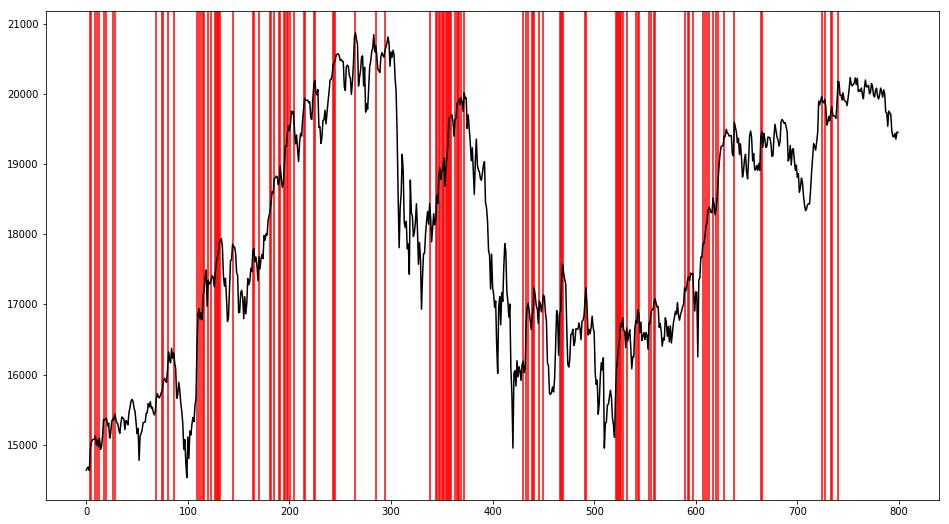

In [20]:
plt.figure(figsize=(16,9))
for i in range(len(price_test)):
    if pred_test[i] >= 1 : 
        plt.axvline(i, color='red')
#     elif pred_test[i] < -1 :
#         plt.axvline(i, color='blue')
#     if y_test[i] > 0.5 : 
#         plt.axvline(i, color='black')
#     elif y_test[i] < -0.5 :
#         plt.axvline(i, color='black')    
plt.plot(price_test, color='black')
plt.show()

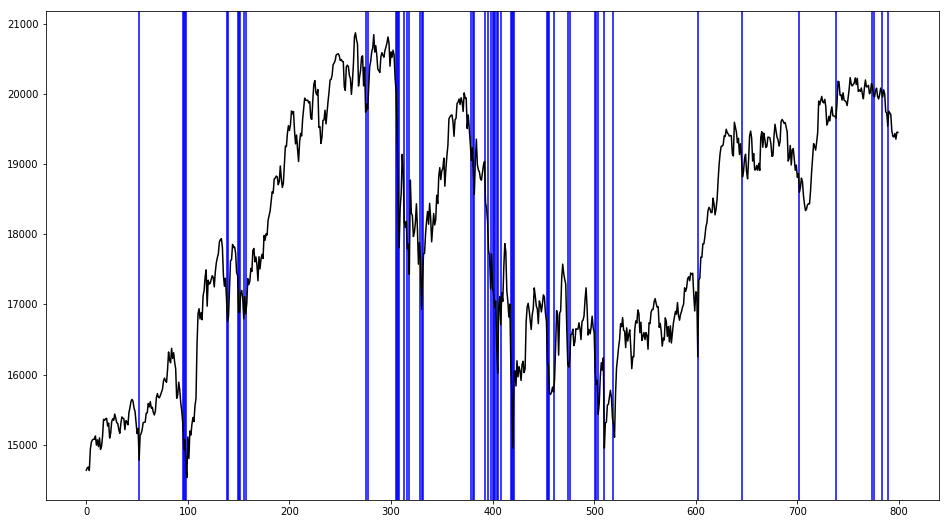

In [21]:
plt.figure(figsize=(16,9))
for i in range(len(price_test)):
#     if pred_test[i] > 0.75 : 
#         plt.axvline(i, color='red')
    if pred_test[i] <= -1:
        plt.axvline(i, color='blue')
#     if y_test[i] > 0.5 : 
#         plt.axvline(i, color='black')
#     elif y_test[i] < -0.5 :
#         plt.axvline(i, color='black')    
plt.plot(price_test, color='black')
plt.show()

In [22]:
# direction test 
in_bound = ((pred_test * test_target.values >= 0) & (test_target.values != 0 )).astype(int)
count_in_bound = np.sum(in_bound)
count_in_bound
print('direction accuracy :', count_in_bound/len(pred_test)*100, '%')

direction accuracy : 53.25 %


In [23]:
sum_corrected = 0 
sum_peak_bot = 0 
for i in range(len(y_test)):
    if (y_test[i] == 1 and pred_test[i] > 0.75) or (y_test[i] == -1 and pred_test[i] < -0.75) :
        sum_corrected += 1 
    if y_test[i] != 0 : 
        sum_peak_bot += 1 

In [24]:
from sklearn.externals import joblib
# regr2 = RandomForestRegressor(n_estimators=50, max_depth=33)
load_model = False 
if load_model : 
    regr2 = joblib.load('Weight/random_forest_Nikkei.pkl')

    print('train score : ', regr2.score(X_train, y_train))
    print('test score : ', regr2.score(X_test, y_test))

    pred_train = regr2.predict(X_train)
    pred_test = regr2.predict(X_test)*n

In [25]:
action = 0 
ret = 1
bh = 1 
log_ret = [] 
log_bh = [] 
action_vol = 5 
vol_buy = 80
vol_sell = 250
rule_buy = -1
rule_sell = 1 

cost = 1 
move_trailing = 1.04
stop_loss = 0.975
for i in range(action_vol, len(price_test)):
    change = (price_test[i] - price_test[i-1])/price_test[i-1]
    vol = price_test[i-action_vol:i].std()
    ret = ret * (1+change*action)
    bh = bh * (1+change)
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        action = 0
        cost = 0 
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        if action == 0 :
            cost = ret
        action = 1
        
    if action == 1 and ret >= cost * move_trailing:
        cost = ret  
    if ret <= cost * stop_loss :
        action = 0 
        cost = 0
        
    log_ret.append(ret)
    log_bh.append(bh)
    
print('model', ret, 'market', bh)
    

model 1.6419578488215945 market 1.3022231300497968


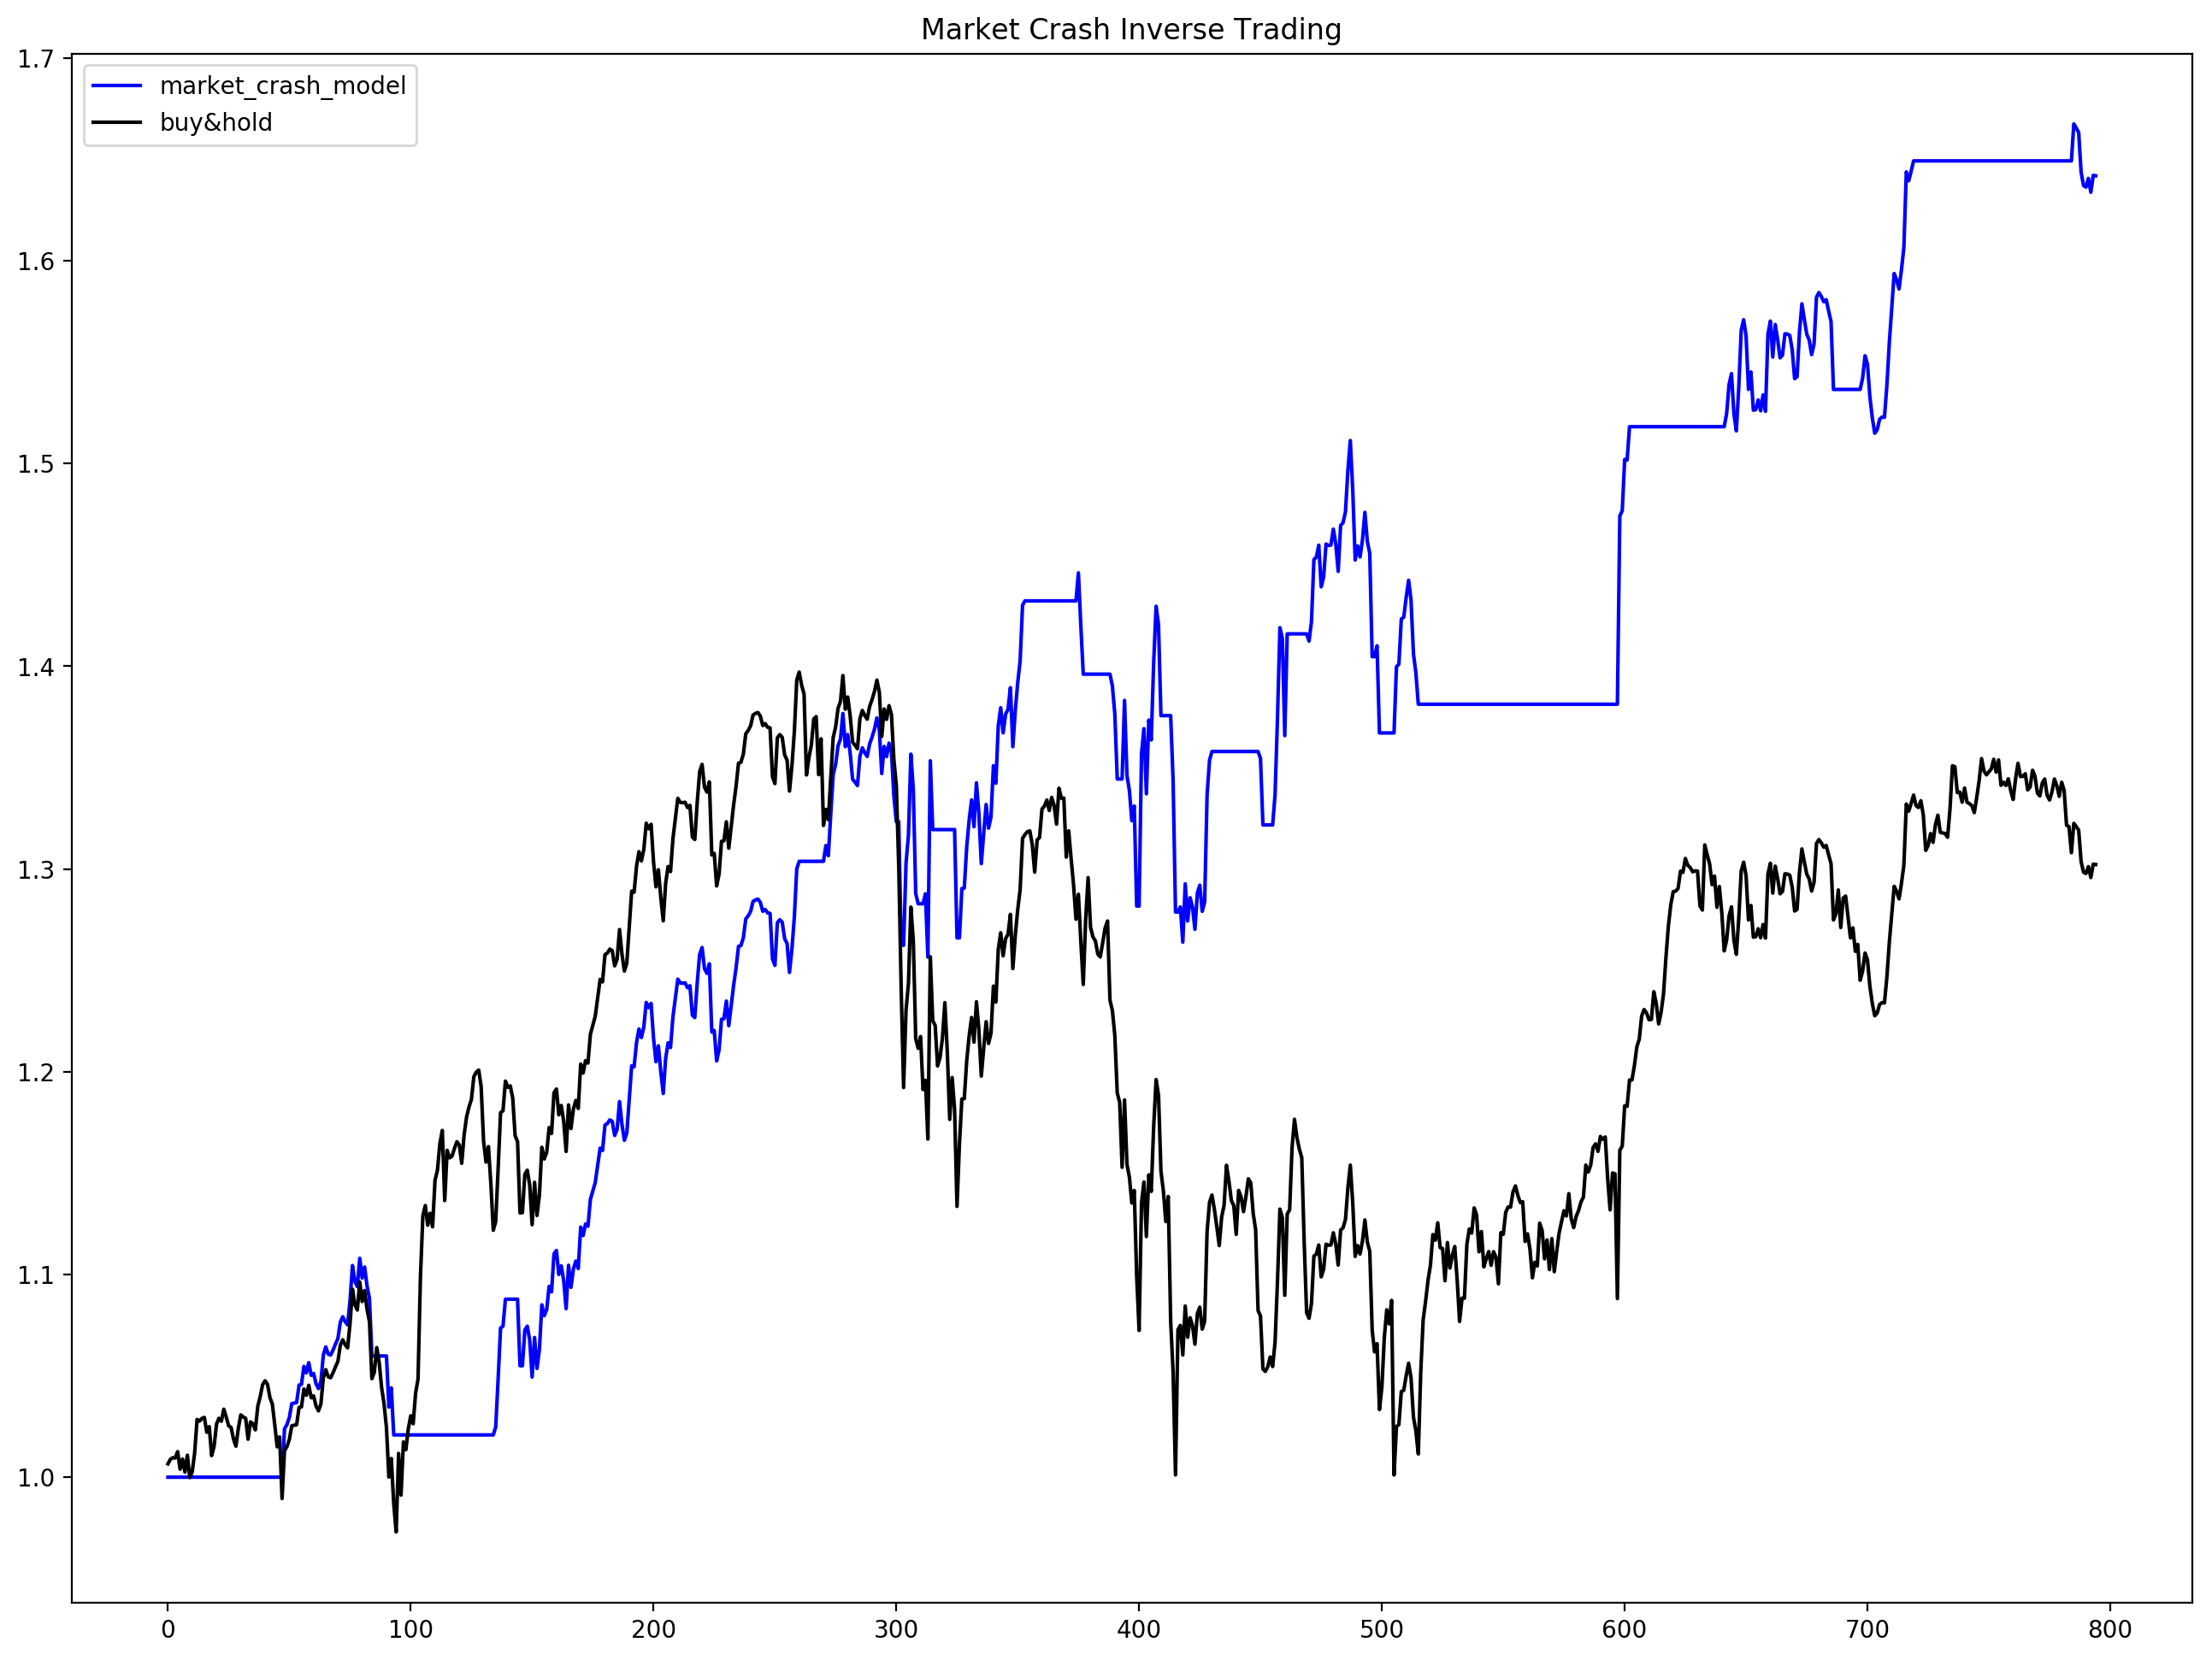

In [26]:
plt.figure(figsize=(16,12), dpi=200)
plt.title('Market Crash Inverse Trading')
plt.plot(log_ret, label='market_crash_model', color='blue')
plt.plot(log_bh, label='buy&hold', color='black')
plt.legend()
plt.savefig('nikkei_ret.png')
plt.show()

In [36]:
from sklearn.externals import joblib
save_model = False
if save_model : 
    joblib.dump(regr2, 'Weight/random_forest_Nikkei.pkl') 
    print('Save Done')

In [28]:
estimator = regr2.estimators_[5]

from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', feature_names = data.iloc[:,7:-1].columns,
                rounded = True, proportion = False, filled = True)


In [29]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100'])

0

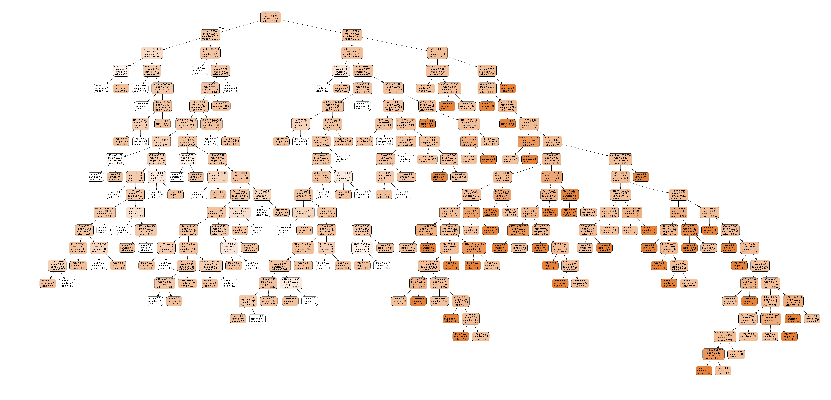

In [30]:
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [31]:
# !dot -Tpng tree.dot -o tree.png -Gdpi=100

In [32]:
len(regr2.feature_importances_)
data.iloc[:,7:].columns


Index(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10',
       ...
       'vol52', 'vol53', 'vol54', 'vol55', 'vol56', 'vol57', 'vol58', 'vol59',
       'vol60', 'Return'],
      dtype='object', length=117)

In [33]:
df = pd.DataFrame()
df['feature'] = data.iloc[:,7:-1].columns
df['important'] = regr2.feature_importances_
df.sort_values('important')

,feature,important
90,vol35,0.001904
99,vol44,0.002605
97,vol42,0.002868
88,vol33,0.002899
93,vol38,0.003028
92,vol37,0.003098
104,vol49,0.003131
100,vol45,0.003164
87,vol32,0.003320
85,vol30,0.003335


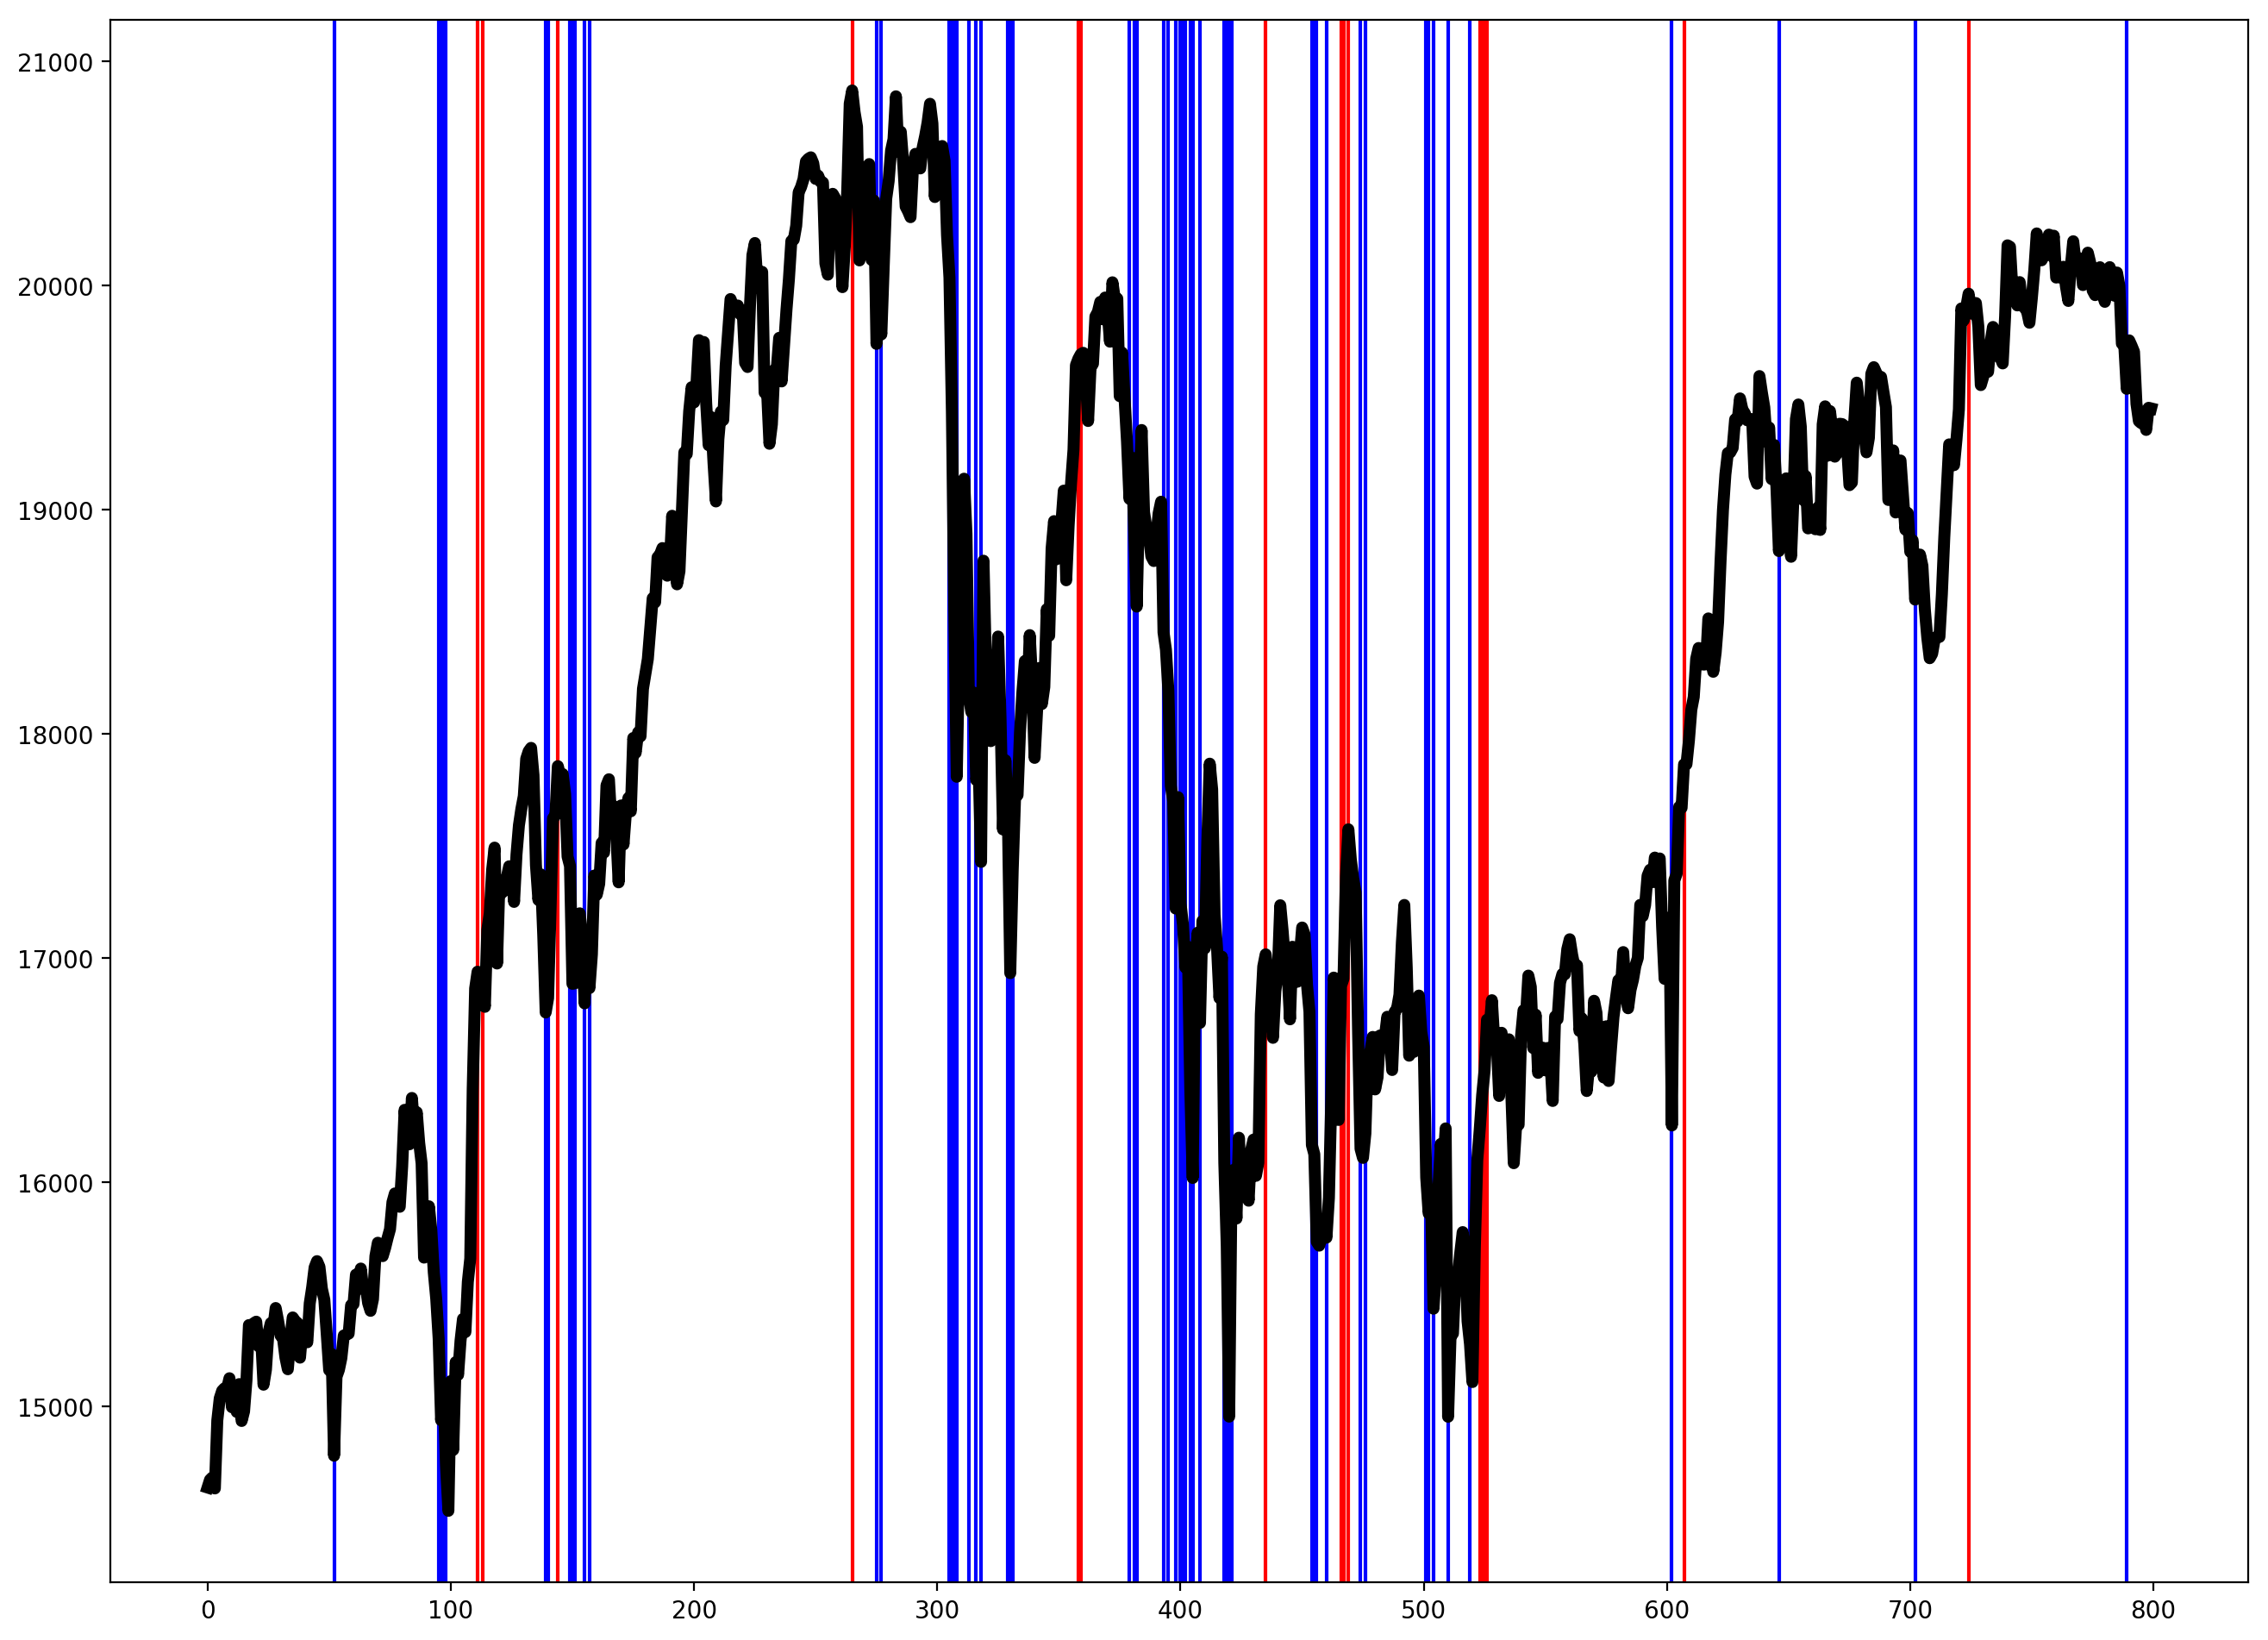

In [34]:
plt.figure(figsize=(16,12), dpi=200)
for i in range(action_vol, len(price_test)):
    vol = price_test[i-action_vol:i].std()
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        plt.axvline(i, color='red')
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        plt.axvline(i, color='blue') 
plt.plot(price_test, color='black', linewidth=5)
plt.savefig('nikkei_action.png')
plt.show()